In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import model_selection
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
import pickle
from urllib.request import urlopen
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Dataset

## Kaggle

Un buon posto dove trovare dataset e/o codici è [kaggle](https://www.kaggle.com/). 


Proviamo ad affrontare un problema a partire da un dataset preso da kaggle:

*   Dataset: https://www.kaggle.com/datasets/abcsds/pokemon?resource=download

Scaricate il dataset e caricatelo nella directory del notebook, a questo punto useremo la libreria pandas per aprire il file ed ottenere le features che ci interessano.

Il dataset è formato da nome, tipo e statistiche di tutti i pokemon. 

In [ ]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0).sample(frac=1)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
64,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,1,False
15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
340,Whiscash,Water,Ground,468,110,78,73,76,71,60,3,False
599,Klink,Steel,NaN,300,40,55,70,45,60,30,5,False
624,Pawniard,Dark,Steel,340,45,85,70,40,40,60,5,False


Una buona libreria per visualizzare i dati è seaborn:

Text(0.5, 1.0, 'Pokemon Attack Distribution')

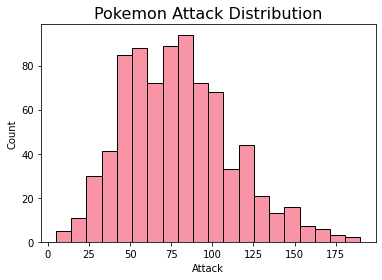

In [ ]:
sns.set_palette("husl", 8)
ax = sns.histplot(pokemon['Attack'])
ax.set_title("Pokemon Attack Distribution", fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Target: Legendary')

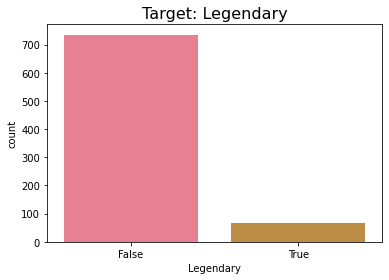

In [ ]:
ax=sns.countplot(x='Legendary', data=pokemon)
ax.set_title("Target: Legendary", fontdict={'fontsize': 16})

Teniamo conto solo delle features associate alle statistiche:

In [ ]:
x, y = pokemon.iloc[:, 4:-2], pokemon.iloc[:, [-1]].values.squeeze()

metodo equivalente:

In [ ]:
#x=pokemon[["HP", "Attack", "Defense", "Speed"]]
#y=pokemon[["Legendary"]].to_numpy().squeeze()

Normalizziamo i dati così che le colonne siano a media nulla e varianza uno. Esistono in realtà varie normalizzazioni e spesso dipendono dal dataset e/o modello che usate. Fate sempre una ricerca bibliografica per studiare cosa è stato fatto in letteratura.

In [ ]:
x=((x-x.mean())/x.std()).values 

In [ ]:
x.shape

(800, 6)

Generiamo train e test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=137)

Altro dataset:

*   [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)




In [ ]:
heart = pd.read_csv("heart.csv", index_col=0)
heart.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Text(0.5, 1.0, 'Target')

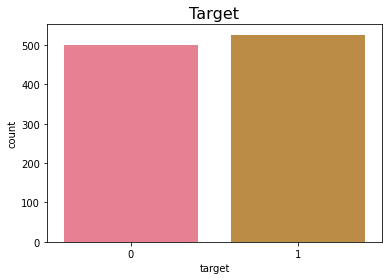

In [ ]:
ax=sns.countplot(x='target', data=heart)
ax.set_title("Target", fontdict={'fontsize': 16})

## Modello di Ising


Dataset di simulazioni del modello di Ising preso dalla review: [A high-bias, low-variance introduction to Machine Learning for physicists](https://arxiv.org/abs/1803.08823). Se vi piace la meccanica statistica, questo è un ottimo toy-dataset sul quale giocare.

In [ ]:
def LoadData(test_size=0.4):
    url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/';
######### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
    data_file_name = "Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
    label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"


#DATA
#
    data = pickle.load(urlopen(url_main + data_file_name)) # pickle reads the file and returns the Python object (1D array, compressed bits)
    data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
    data=data.astype('double')
    data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

#LABELS (convention is 1 for ordered states and 0 for disordered states)
    labels = pickle.load(urlopen(url_main + label_file_name))
    print("data loaded")
    X_ordered=np.zeros((70000,40*40))
    X_ordered=data[:70000,:]
    Y_ordered=labels[:70000]

    X_critical=data[70000:100000,:]
    Y_critical=labels[70000:100000]

    X_disordered=data[100000:,:]
    Y_disordered=labels[100000:]
    del data,labels

    X=np.concatenate((X_ordered,X_disordered,X_critical))
    Y=np.concatenate((Y_ordered,Y_disordered,Y_critical))
    del X_ordered,X_disordered,Y_ordered, Y_disordered
    
    #p = ny.random.permutation(len(X))
    #X,Y=X[p],Y[p]
    #X_ae,X_clf,Y_ae,Y_clf=train_test_split(X,Y,test_size=0.5)
    #X_ae,X_ae_test,Y_ae,Y_ae_test=train_test_split(X_ae,Y_ae,test_size=0.3)
    #X_clf,X_clf_test,Y_clf,Y_clf_test=train_test_split(X_clf,Y_clf,test_size=0.3)

    X,X_test,Y,Y_test=train_test_split(X,Y,test_size=0.3)
    print('X_train shape:', X.shape)
    print('Y_train shape:', Y.shape)
    print()
    print(X.shape[0], 'train samples')
    print(X_critical.shape[0], 'critical samples')
    print(X_test.shape[0], 'test samples')
    return X,X_test,Y,Y_test,X_critical,Y_critical

In [ ]:
X,X_test,Y,Y_test, X_critical, Y_critical=LoadData() #attenzione al peso

data loaded
X_train shape: (112000, 1600)
Y_train shape: (112000,)

112000 train samples
30000 critical samples
48000 test samples


In [ ]:
X.shape

(112000, 1600)

# Cross Validation

La cross validation è una tecnica usata per esplorare gli iperparametri dei modelli usando un numero limitato di dati. Il dataset viene suddiviso in S insiemi, su S-1 insiemi si addestra il modello con dei dati iperparametri mentre l'ultimo insieme viene usato come "validation set".

Dal [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf):

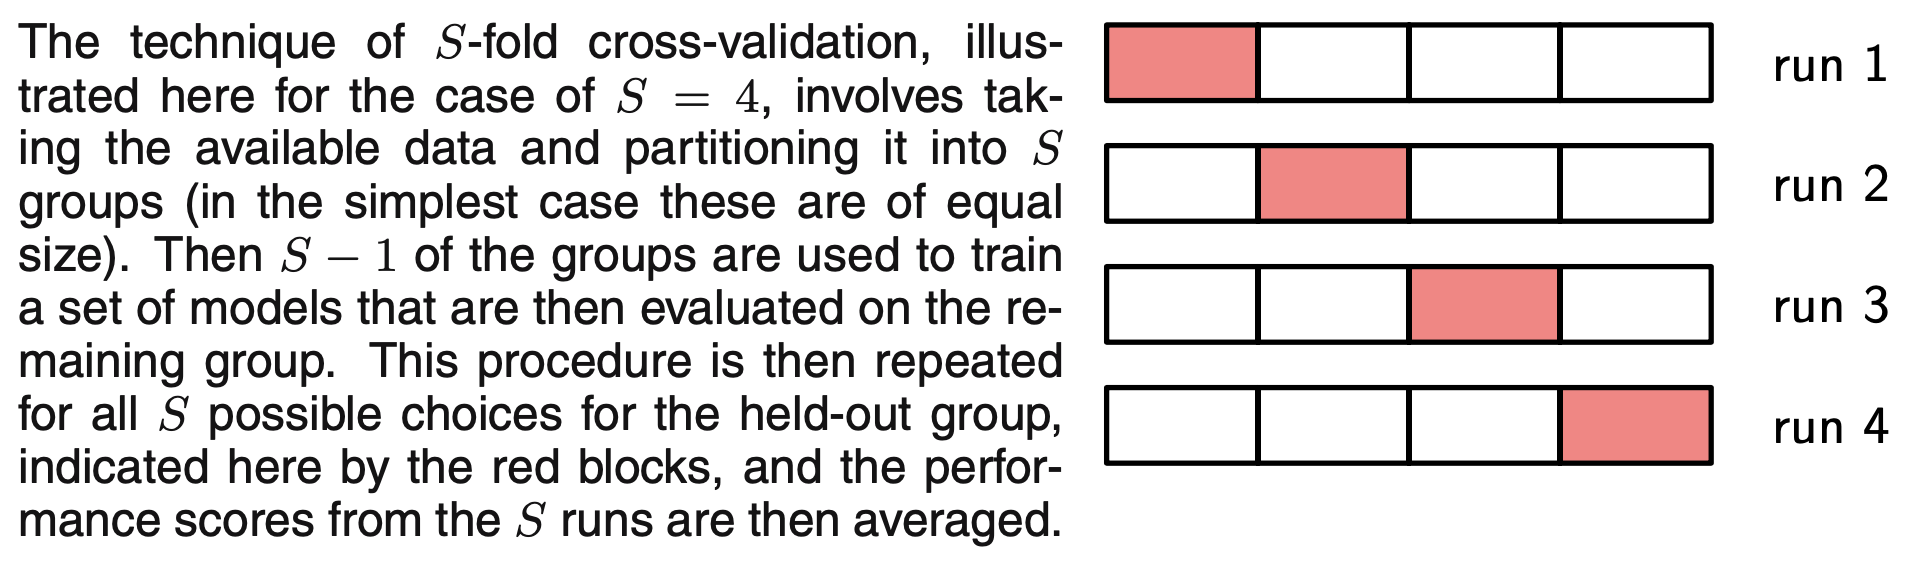

In [ ]:
def tuning(model,hyperparameters,X,y,n_splits):
    #Su alcune referenze chiamano questo medoto SFold, altre KFold
    #KFold: genera gli split
    cv = model_selection.KFold(n_splits=n_splits, shuffle=True,random_state=0) 
    #Questa funzione invece testa tutti gli iperparametri e restituisce il modello
    #con gli parametri migliori 
    gs = model_selection.GridSearchCV(model, hyperparameters, cv=cv, n_jobs=-1,verbose=2)
    #In fine, addestriamo il modello su tutto il dataset
    gs.fit(X, y)
    return gs

# Support Vector Machine

Il [Support Vector Machine](https://dl.acm.org/doi/abs/10.1145/130385.130401) è un modello lineare che introduce il concetto di "margine", definito come la minima distanza tra il decision boundary ed i campioni $X$. I dati che si trovano sul margine sono chiamati "Support Vector".


Immagine presa dal [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf):

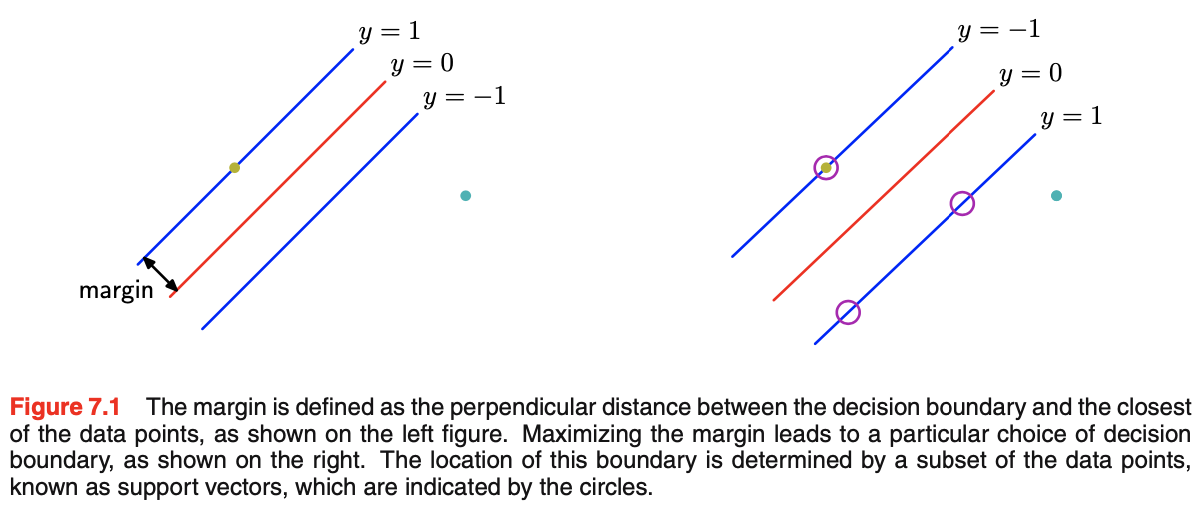

Essendo un modello linerare, il SVM soffre i dataset non linearmente separabili. Per affrontare questo problema è possibile preprocessare i dati usando dei cosiddetti "kernel" capaci di mappare i campioni in nuovi spazi (generalmente con più features) che si spera siano linearmente separabili. Questa procedura è indipendente dal modello di machine learning scelto, nel caso di SVM però, i kernel vengono implementati direttamente nell'agoritmo.

Esempio di SVM con kernel gaussiano ([Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)): 

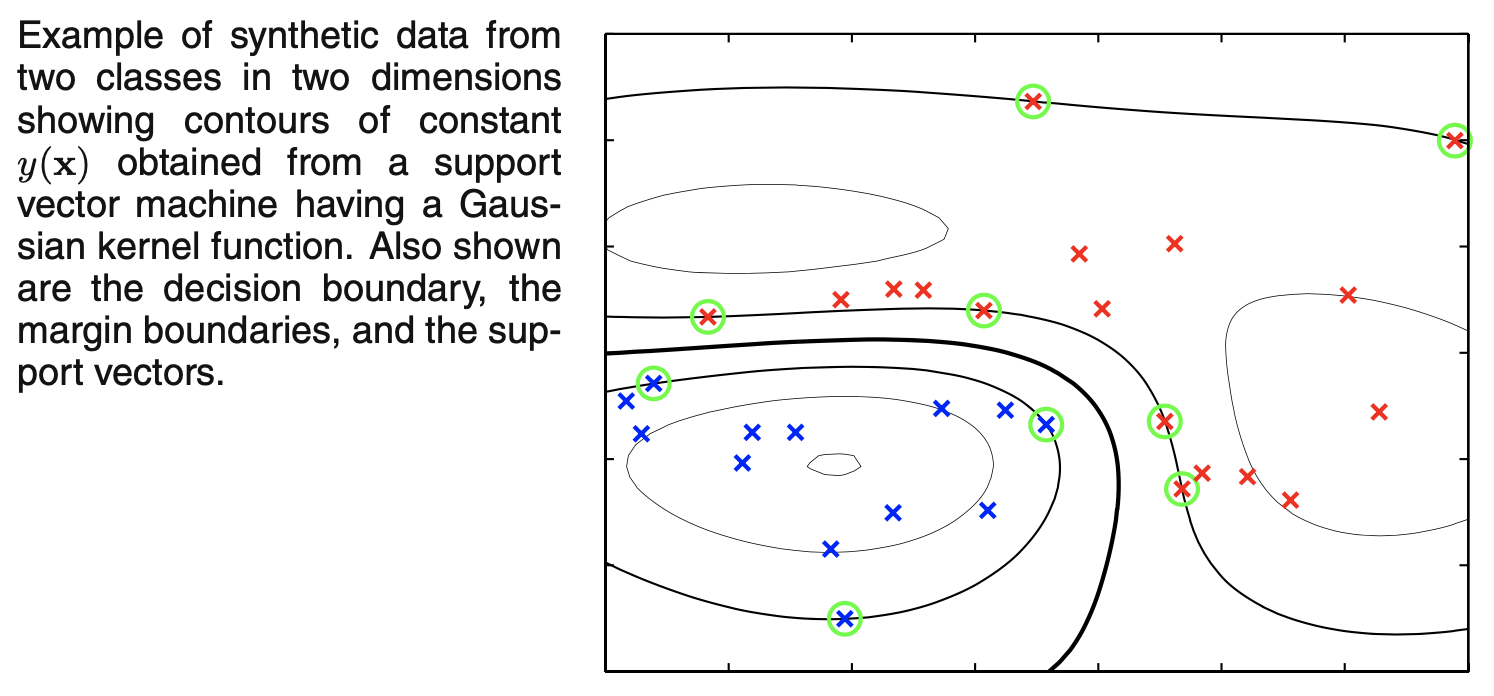

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
print("ROC AUC Score:",roc_auc_score(y_test,svc.predict(X_test)))
print(classification_report(y_test,svc.predict(X_test)))

ROC AUC Score: 0.7559487492373398
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       149
        True       0.55      0.55      0.55        11

    accuracy                           0.94       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.94      0.94      0.94       160



https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Iperparametri:

*   Penality C: regolarizzatore
*   Kernel: 'linear', 'poly', 'rbf', ...
*   Gamma: Parametro associato al kernel


Tuniamo il modello:

In [ ]:
svc = SVC()
kernel=['linear','rbf']
Cs=[1,10,100]
gamma=np.logspace(-3, 1, 4)
hypSVC=dict(gamma=gamma,kernel=kernel,C=Cs)

kfold=5

In [ ]:
tunedSVC=tuning(svc,hypSVC,X_train,y_train,kfold)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
print("ROC AUC Score:",roc_auc_score(y_test,tunedSVC.predict(X_test)))
print(classification_report(y_test,tunedSVC.predict(X_test)))

ROC AUC Score: 0.762660158633313
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       149
        True       0.67      0.55      0.60        11

    accuracy                           0.95       160
   macro avg       0.82      0.76      0.79       160
weighted avg       0.95      0.95      0.95       160



#Decision Tree

I Decision Tree sono un algoritmo molto utlizzato che si basa sul "partizionare" il dataset in regioni cubodiche delimitate da dei valori che rappresentano i parametri $\theta$ del modello.

Dal [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf):

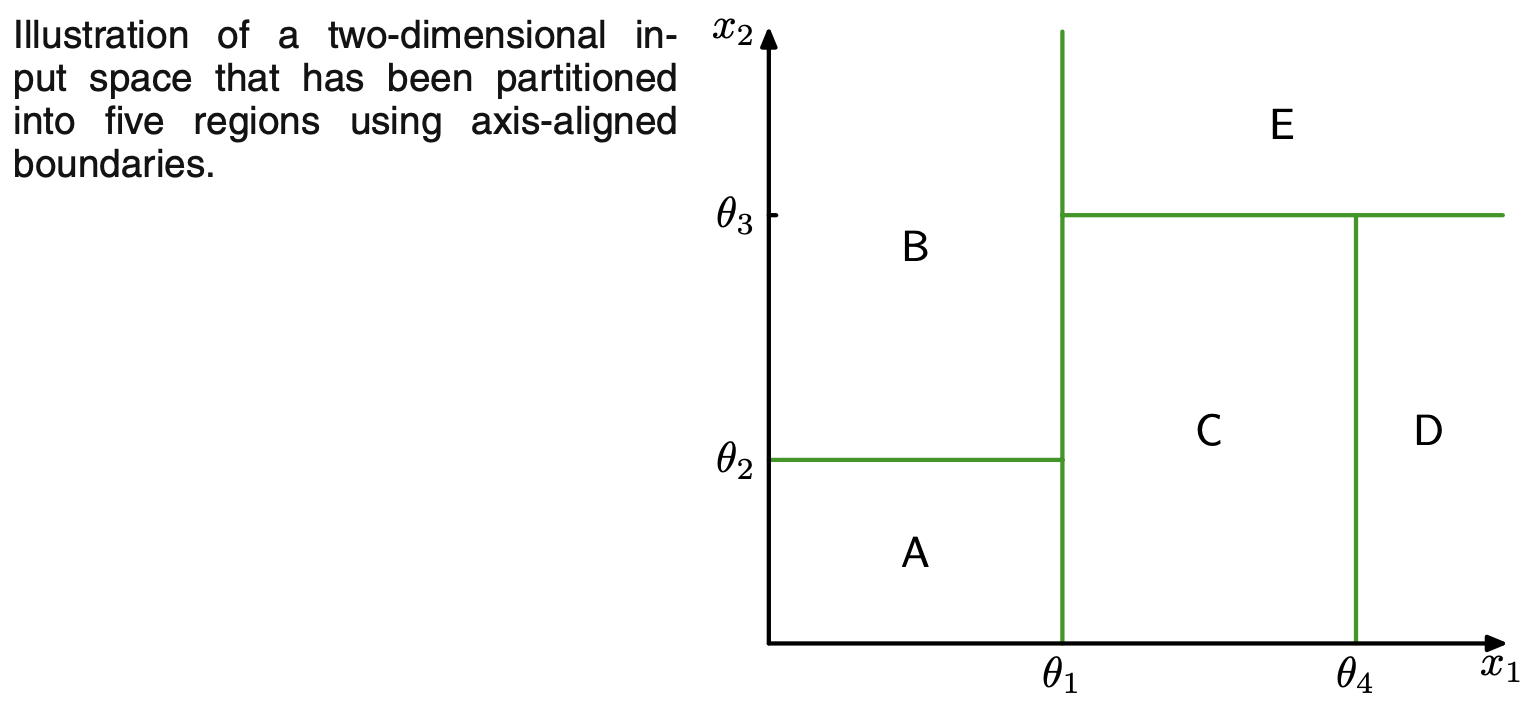

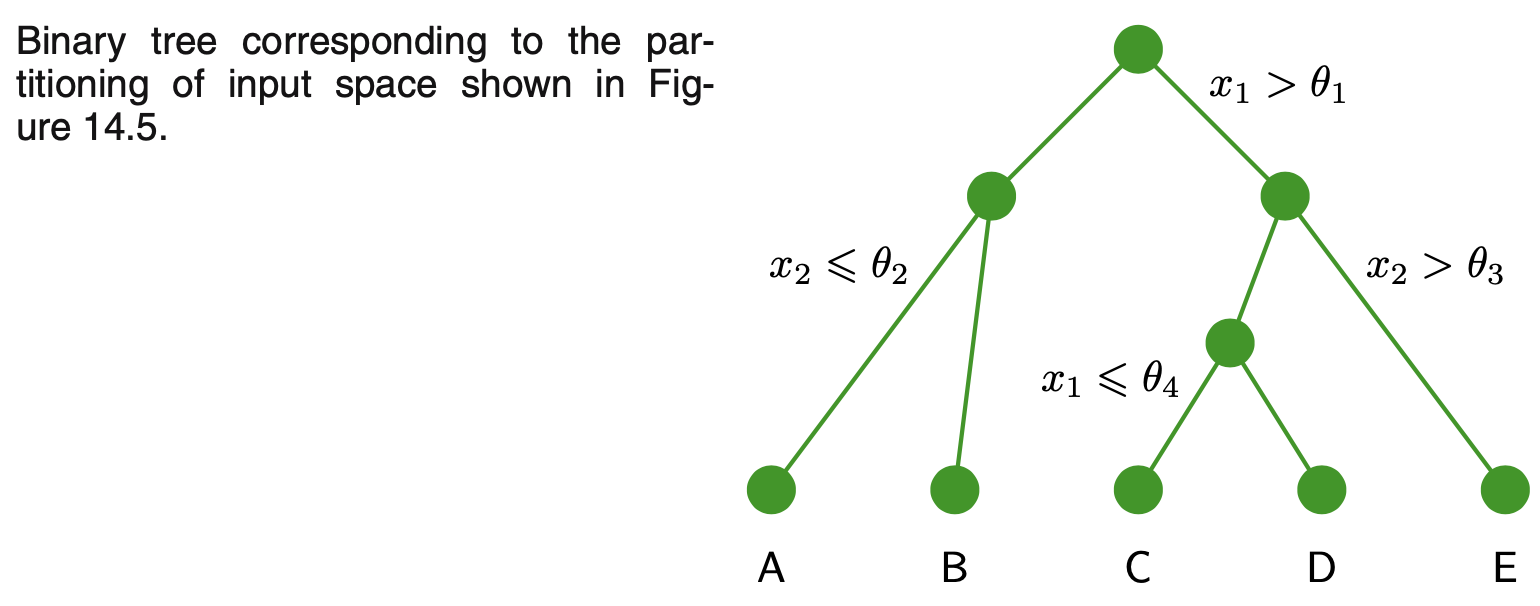

I parametri dell modello vengono stimati tramite procedure iterative che cercano i valori migliori di $\theta$ massimizzando delle metriche come il coefficente di Gini. Alla fine dell'addestramento, le partizioni trovate dall'algoritmo corrisponderanno alle classi/valori della regrassione che vogliamo predirre.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

print("ROC AUC Score:",roc_auc_score(y_test,tree.predict(X_test)))
print(classification_report(y_test,tree.predict(X_test)))

ROC AUC Score: 0.7354166666666667
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       240
        True       0.63      0.50      0.56        24

    accuracy                           0.93       264
   macro avg       0.79      0.74      0.76       264
weighted avg       0.92      0.93      0.92       264



# Random Forest

Il random forest e' un modello ad ensables che si basa sulla tecnica di "Bootstrap aggregating" spesso chiamata Bagging. Consideriamo un dataset $X=(x_1,...,x_N)$, una cosa che possiamo fare e' generare un nuovo dataset $X_B$ campionando da $X$ $L$ dati senza preoccuparci di eventuali doppioni. 

$$X_B=(x_2,...,x_j,x_j,..,x_{N-4})$$

Possiamo dunque ripetere questa procedura $M$ volte e su ogni dataset addestriamo un modello di machine learning per poi mediare sulle predizioni di ciascun modello per ottenere $\hat{y}$. Nel caso in cui usassimo dei decision tree otterremmo una "foresta" di alberi chiamata Random Forest.



*   Numero di alberi: n_estimators
*   Numero massimo di nodi per albero: max_depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfs = RandomForestClassifier()
rfs.fit(X_train,y_train)

print("ROC AUC Score:",roc_auc_score(y_test,rfs.predict(X_test)))
print(classification_report(y_test,rfs.predict(X_test)))

ROC AUC Score: 0.7208333333333333
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       240
        True       0.73      0.46      0.56        24

    accuracy                           0.94       264
   macro avg       0.84      0.72      0.76       264
weighted avg       0.93      0.94      0.93       264



# Gradient Boosting

Il gradient boosting e' la tecnica ad ensambles piu' popolare. A differenza del Bagging, al posto di generare M dataset diversi, associamo un peso ad ogni dato (generalmente $1/N$) e addestriamo una sequenza di modelli. Ad ogni step i pesi associati ai dati vengono modificati tenendo conto delle performance del modello addestrato. Cosi' facendo, ogni modello della squenza si concentrera' sui dati che non vengono classificati correttamente dai modelli precedenti. Alla fine, $\hat{y}$ viene calcolato componendo le predizioni di tutti i modelli.

Dal [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf):

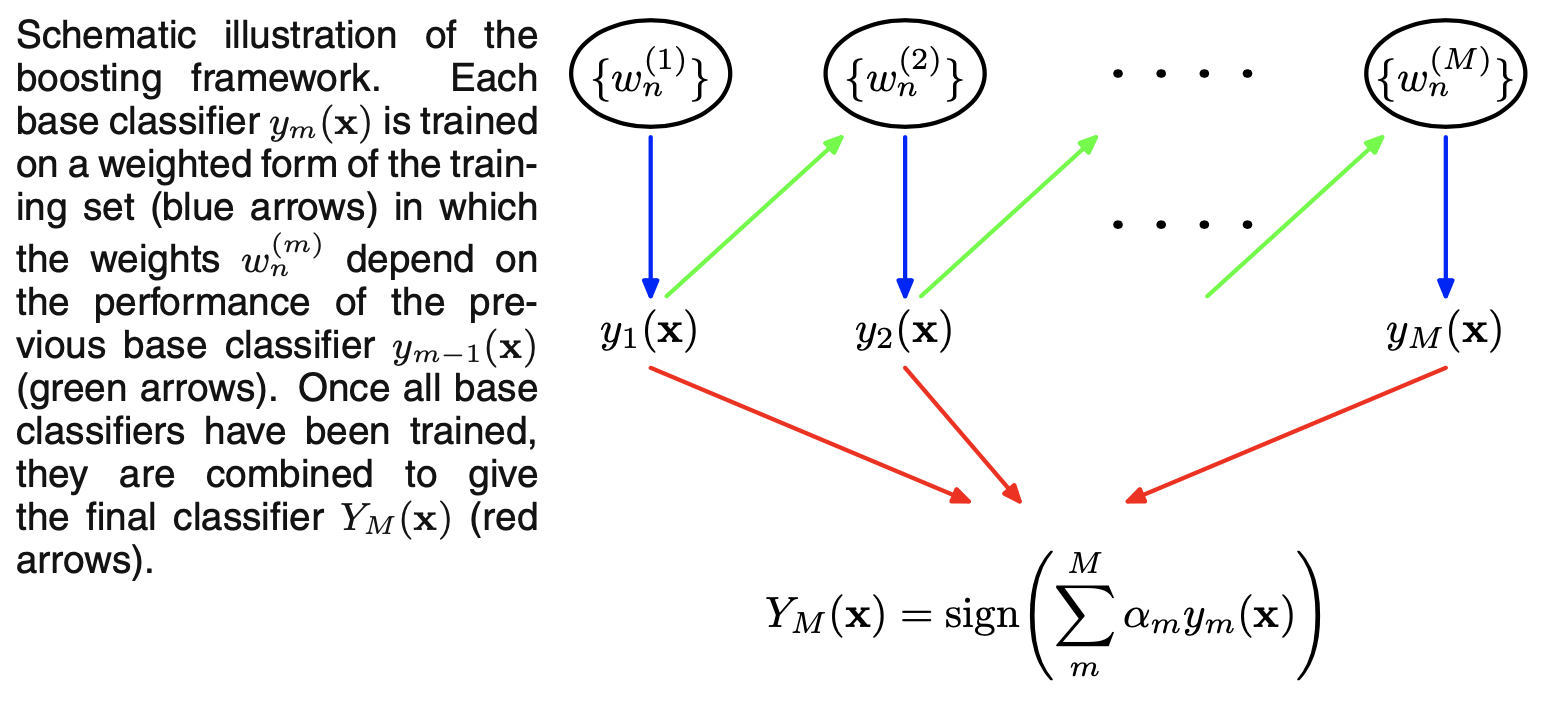

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier()

In [ ]:
GBC.fit(X_train,y_train)

print("ROC AUC Score:",roc_auc_score(y_test,GBC.predict(X_test)))
print(classification_report(y_test,GBC.predict(X_test)))

ROC AUC Score: 0.7145833333333332
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       240
        True       0.61      0.46      0.52        24

    accuracy                           0.92       264
   macro avg       0.78      0.71      0.74       264
weighted avg       0.92      0.92      0.92       264



#Esecizio

Segli un dataset ed esegui una "model selection", ovvero addestra e finetuna diversi modelli per poi confrontane le performance cosi' da scegliere il modello migliore. 